In [1]:
using DataFrames
using CSV
using StatsPlots

ArgumentError: ArgumentError: Package StatsPlots not found in current path:
- Run `import Pkg; Pkg.add("StatsPlots")` to install the StatsPlots package.


# I. Acquire Data
https://www.kaggle.com/super13579/seir-model-pr-model-for-covid19-global-forecast

In [2]:
train_df = CSV.read("week5/train.csv")
first(train_df, 6)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
,Int64,String⍰,String,Dates…,Float64,Float64
1,1,missing,Afghanistan,2020-01-22,0.0,0.0
2,2,missing,Afghanistan,2020-01-23,0.0,0.0
3,3,missing,Afghanistan,2020-01-24,0.0,0.0
4,4,missing,Afghanistan,2020-01-25,0.0,0.0
5,5,missing,Afghanistan,2020-01-26,0.0,0.0
6,6,missing,Afghanistan,2020-01-27,0.0,0.0


In [14]:
describe(train_df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Id,14684.0,1,14684.0,29367,,,Int64
2,Province_State,,Alabama,,Zhejiang,125,11323,"Union{Missing, String}"
3,Country_Region,,Afghanistan,,Zimbabwe,173,,String
4,Date,,2020-01-22,,2020-03-28,67,,Date
5,ConfirmedCases,418.251,0.0,0.0,92472.0,,,Float64
6,Fatalities,16.2581,0.0,0.0,10023.0,,,Float64


In [58]:
print("Range of dates with data: ")
print(unique(train_df.Date)[1], " -> ", unique(train_df.Date)[end])

Range of dates with data: 2020-01-22 -> 2020-03-28

# II. Visualize Confirmed Cases

## 2.1 Worldwide

In [27]:
world_df = by(train_df, :Date, :ConfirmedCases => sum, :Fatalities => sum)
colnames = ["Date", "ConfirmedCases", "Fatalities"]
rename!(world_df, Symbol.(colnames))

first(world_df, 6)

,Date,ConfirmedCases,Fatalities
,Dates…,Float64,Float64
1,2020-01-22,554.0,17.0
2,2020-01-23,653.0,18.0
3,2020-01-24,939.0,26.0
4,2020-01-25,1432.0,42.0
5,2020-01-26,2113.0,56.0
6,2020-01-27,2922.0,82.0


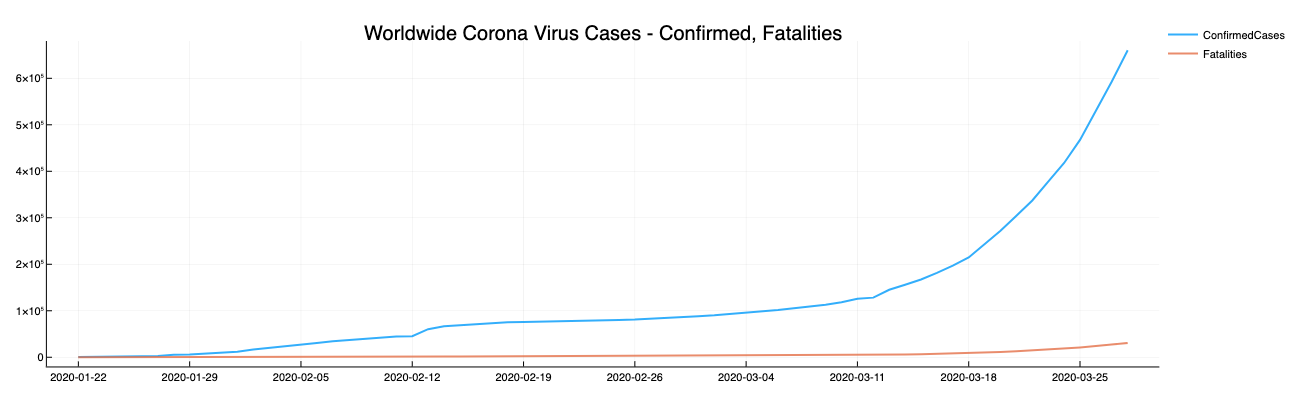

In [47]:
plotly() # Set the backend to Plotly
@df world_df plot(
    :Date,
    [:ConfirmedCases :Fatalities],
    lw = 2,
    size = (1200, 400),
    alpha = 0.8,
    # xticks = :Date,
    xticks = world_df.Date[1:7:end],
    title = "Worldwide Corona Virus Cases - Confirmed, Fatalities"
)

## 2.2 Top 10 Countries (exclusive of China)

In [60]:
last_day_df = train_df[train_df.Date.==unique(train_df.Date)[end],:]
countries_df = by(last_day_df, :Country_Region, :ConfirmedCases => sum, :Fatalities => sum)
colnames = ["Country", "ConfirmedCases", "Fatalities"]
rename!(countries_df, Symbol.(colnames))
sort!(countries_df, [:ConfirmedCases], rev=true);

first(countries_df, 6)

,Country,ConfirmedCases,Fatalities
,String,Float64,Float64
1,US,121326.0,2023.0
2,Italy,92472.0,10023.0
3,China,81999.0,3299.0
4,Spain,73235.0,5982.0
5,Germany,57695.0,433.0
6,France,38105.0,2317.0


In [63]:
top10_countries = countries_df.Country[1:11]
top10_countries = filter!(c->c≠"China", top10_countries)
top10_countries

10-element Array{String,1}:
 "US"
 "Italy"
 "Spain"
 "Germany"
 "France"
 "Iran"
 "United Kingdom"
 "Switzerland"
 "Netherlands"
 "Korea, South"